<h1>THÊM THƯ VIỆN</h1>
pip install pmdarima -- Cài đặt thư viện

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

<h1>NẠP DỮ LIỆU</h1>

In [3]:
data = pd.read_csv("Q:/4. Learning/3nd year students/1. Data business analytics/Report Data Business Analytics/time-series-forecasting/Dataset/Microsoft_Stock.csv")
data

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1506,3/25/2021 16:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00,233.53,233.85,231.10,231.85,24792012


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [5]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1511 non-null   datetime64[ns]
 1   Open    1511 non-null   float64       
 2   High    1511 non-null   float64       
 3   Low     1511 non-null   float64       
 4   Close   1511 non-null   float64       
 5   Volume  1511 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 71.0 KB


In [6]:
for i in range(len(data["Date"])):
      data["Date"][i]= data["Date"][i].strftime('%Y-%m-%d')
data

,Date,Open,High,Low,Close,Volume
0,2015-04-01,40.60,40.76,40.31,40.72,36865322
1,2015-04-02,40.66,40.74,40.12,40.29,37487476
2,2015-04-06,40.34,41.78,40.18,41.55,39223692
3,2015-04-07,41.61,41.91,41.31,41.53,28809375
4,2015-04-08,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1506,2021-03-25,235.30,236.94,231.57,232.34,34061853
1507,2021-03-26,231.55,236.71,231.55,236.48,25479853
1508,2021-03-29,236.59,236.80,231.88,235.24,25227455
1509,2021-03-30,233.53,233.85,231.10,231.85,24792012


In [7]:
data.set_index('Date',inplace=True)

In [8]:
data.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


<h1>DATA ANALYSIS</h1>

In [9]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = data.index, y = data.High,
                    mode='lines',
                    name='High',
                    marker_color = '#2CA02C',
                    visible = "legendonly"))
fig.add_trace(go.Scatter(x = data.index, y = data.Low,
                    mode='lines',
                    name='Low',
                    marker_color = '#D62728',
                    visible = "legendonly"))
fig.add_trace(go.Scatter(x = data.index, y = data.Open,
                    mode='lines',
                    name='Open',
                    marker_color = '#FF7F0E',
                    visible = "legendonly"))
fig.add_trace(go.Scatter(x = data.index, y = data.Close,
                    mode='lines',
                    name='Close',
                    marker_color = '#1F77B4'))

fig.update_layout(
    title='Microsoft history',
    titlefont_size = 28,
    
    xaxis = dict(
        title='Date',
        tickmode="array",
        tickvals=[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
        ticktext=[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
        titlefont_size=16,
        tickfont_size=14),
    
    height = 800,
    
    yaxis=dict(
        title='Prices',
        titlefont_size=16,
        tickfont_size=14),
    
    legend=dict(
        y=0,
        x=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'))

fig.show()

<AxesSubplot:title={'center':'Cổ phiếu Microsoft thực tế'}, xlabel='Dates', ylabel='Dollars'>

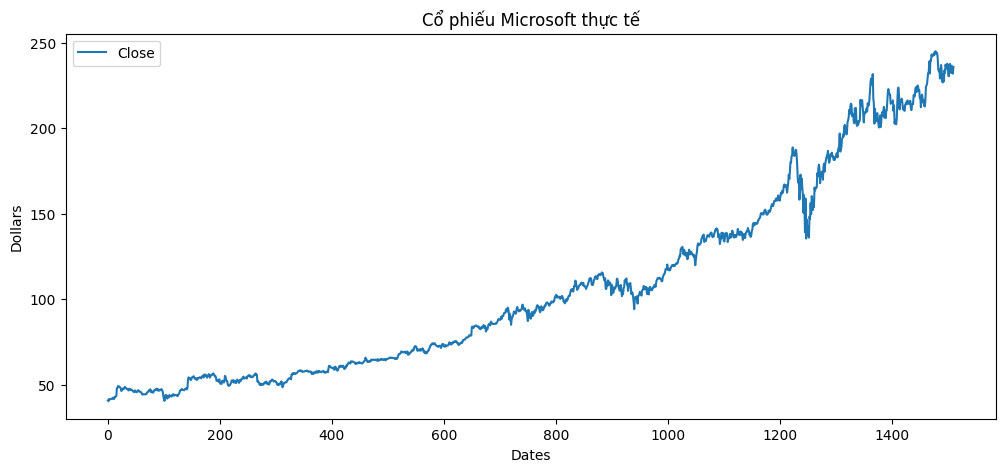

In [10]:
df = data[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

title ='Cổ phiếu Microsoft thực tế'
ylabel='Dollars'
xlabel='Dates'
df.plot(figsize=(12,5),title=title,xlabel=xlabel, ylabel=ylabel)

In [11]:
# 2. chia train test validate theo tỉ lệ 7:1:2
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

<h1>XÂY DỰNG MÔ HÌNH SARIMAX</h1>


In [12]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(df, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=5.56 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=9731.427, Time=0.08 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=7424.527, Time=1.16 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=8611.001, Time=1.19 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=9819.716, Time=0.08 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=7730.700, Time=0.28 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=7202.381, Time=4.52 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=9.54 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=4.01 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=9610.810, Time=3.71 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=7123.710, Time=6.47 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=7355.902, Time=3.32 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=22.27 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=7.11 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1511
Model:             SARIMAX(3, 0, 2)x(2, 1, [], 12)   Log Likelihood               -3548.216
Date:                             Sun, 07 May 2023   AIC                           7114.432
Time:                                     08:56:17   BIC                           7162.245
Sample:                                          0   HQIC                          7132.245
                                            - 1511                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2298      0.071      3.214      0.001       0.090       0.370
ar.L1          1.0919      0.097     11.230      0.000       0.901       1.282
ar.L2         -0.3410      0.078     -4.391      0.000      -0.493      -0.189
ar.L3          0.1742      0.065      2.701      0.007       0.048       0.301
ma.L1         -0.3787      0.097     -3.917      0.000      -0.568      -0.189
ma.L2          0.3571      0.057      6.225      0.000       0.245       0.469
ar.S.L12      -0.6246      0.013    -46.547      0.000      -0.651      -0.598
ar.S.L24      -0.3800      0.014    -27.397      0.000      -0.407      -0.353
sigma2         6.6260      0.114     58.154      0.000       6.403       6.849
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              4322.15
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):              20.44   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
import statsmodels.api as sm
pred_start = test_data.index[0]
pred_end = test_data.index[-1]
model = sm.tsa.statespace.SARIMAX(df,order=(3,0,2),seasonal_order =(2,1,0,12))
model_fit = model.fit()
pred = model_fit.predict(start= pred_start , end = pred_end)
pred

1057    131.819661
1058    131.518475
1059    132.820041
1060    132.491685
1061    132.946841
           ...    
1354    209.381383
1355    208.977524
1356    214.741848
1357    211.402481
1358    215.348868
Name: predicted_mean, Length: 302, dtype: float64

<AxesSubplot:>

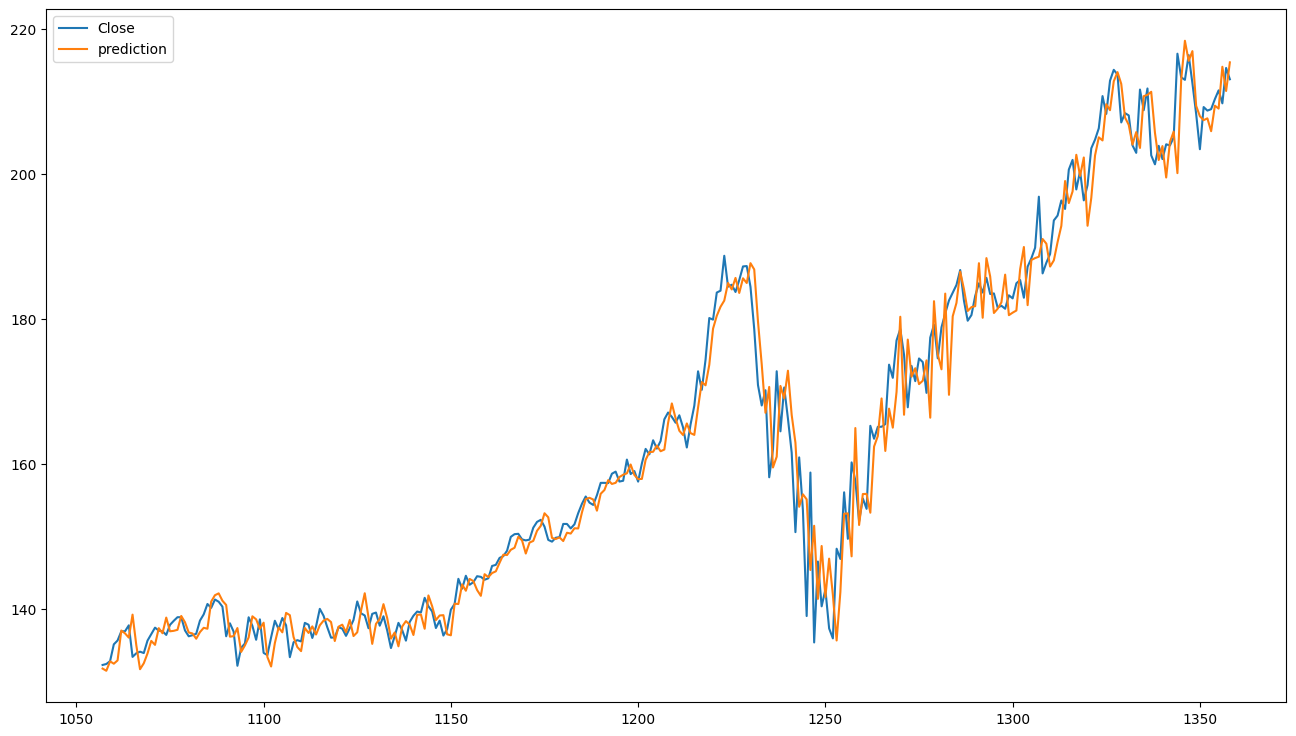

In [18]:
df_sarimax = pd.DataFrame(test_data)
df_sarimax["prediction"] = pd.Series(pred,index=test_data.index)
df_sarimax.plot(figsize=(16,9))

In [19]:
model2 = sm.tsa.statespace.SARIMAX(df,order=(3,1,2),seasonal_order =(2,1,0,12))
model_fit2= model2.fit()
pred2 = model_fit2.predict(start= pred_start , end = pred_end)
pred2

1057    132.245748
1058    131.335771
1059    132.671433
1060    132.862521
1061    133.874847
           ...    
1354    210.556340
1355    210.094881
1356    215.137865
1357    210.968941
1358    214.538277
Name: predicted_mean, Length: 302, dtype: float64

<AxesSubplot:>

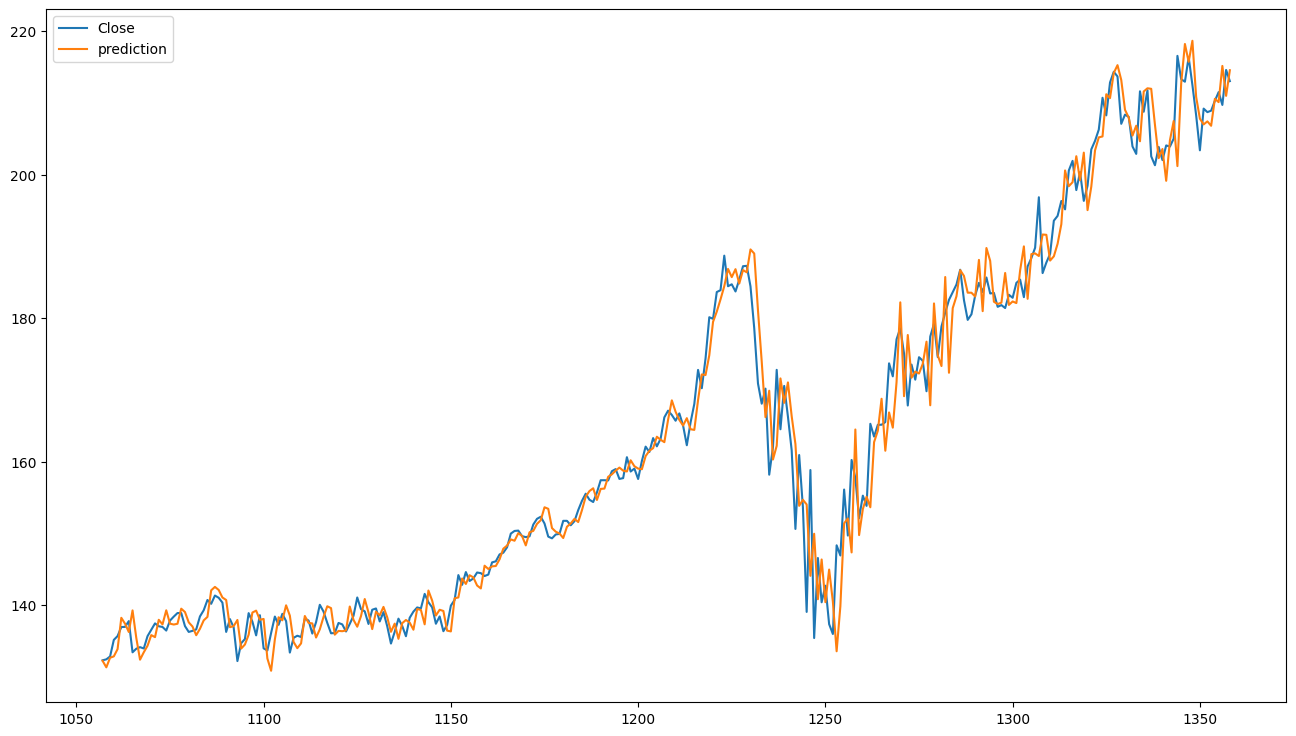

In [20]:
df_sarimax2 = pd.DataFrame(test_data)
df_sarimax2["prediction"] = pd.Series(pred2,index=test_data.index)
df_sarimax2.plot(figsize=(16,9))

In [21]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

TypeError: predict() missing 1 required positional argument: 'params'

In [ ]:
# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [ ]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[131.69407618 131.30180811 131.13098077 131.40940382 131.27408916
 131.08606494 131.3321824  131.37549905 131.21353239 131.38484698
 131.53219482 131.42811577 131.52367503 131.71310563 131.67965944
 131.72036043 131.90812885 131.94074981 131.95420007 132.11570087
 132.19867215 132.20935148 132.33629163 132.44968698 132.47409649
 132.56958662 132.69485469 132.74057176 132.81380989 132.93711944]


In [ ]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 84.90144423315431
Testing RMSE: 27.070272379633998


In [ ]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 84.90144423315431
Testing RMSE: 27.070272379633998


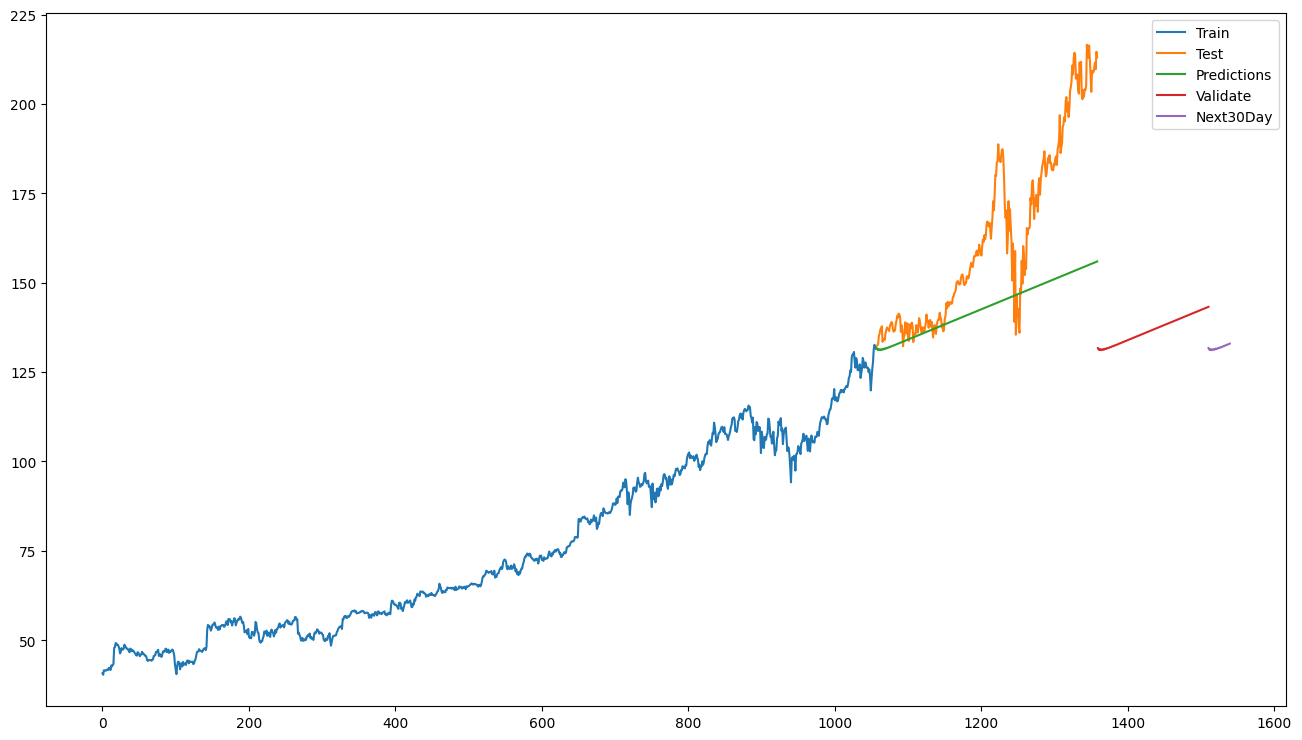

In [ ]:
# 9.Vẽ hình
plt.figure(figsize=(16,9))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [ ]:
test_data.index

RangeIndex(start=1057, stop=1359, step=1)